# Handling multi-dimensional arrays with xarray

## Authors & Contributors

### Authors

- Pier Lorenzo Marasco, Ispra (Italy), [@pl-marasco](https://github.com/pl-marasco)
- Anne Fouilloux, Simula Research Laboratory (Norway), [@annefou](https://github.com/annefou)

### Contributors

- Alejandro Coca-Castro, The Alan Turing Institute (United Kingdom), [@acocac](https://github.com/acocac)
- Guillaume Eynard-Bontemps, CNES (France), [@guillaumeeb](https://github.com/guillaumeeb)

<div class="alert alert-info">
    <i class="fa-question-circle fa" style="font-size: 22px;color:#666;"></i> <b>Overview</b>
    <br>
    <br>
    <b>Questions</b>
    <ul>
        <li>What is Xarray?</li>
        <li>How to open a local file?</li>
        <li>How to print metadata information?</li>
        <li>How to make a selection?</li>
        <li>How to visualize with matplotlib?</li>
        <li>How to perform basic computations, statistics and aggregations?</li>
        <li>How to mask data?</li>
    </ul>
    <b>Objectives</b>
    <ul>
        <li>Learn about Xarray Python ecosystem</li>
        <li>Learn file handling with xarray</li>
        <li>Learn to get metadata information</li>
        <li>Learn to select and mask data</li>
        <li>Learn to make basic computations, aggregations and statistics</li>
        <li>Learnn to visualize data</li>
    </ul>
</div>

## Context

We will be using the [Pangeo](https://pangeo.io/) open-source software stack for visualizing the Particle Matter < 2.5 μm and computing time averaged values (such as daily mean and other statistics).

### Data

We will be using data from [Copernicus Atmosphere Monitoring Service](https://ads.atmosphere.copernicus.eu/)
and more precisely PM2.5 ([Particle Matter < 2.5 μm](https://en.wikipedia.org/wiki/Particulates#Size,_shape_and_solubility_matter)) 4 days forecast from December, 22 2021.

The dataset can be downloaded from [Zenodo](https://zenodo.org/): [PM2.5 4 days forecast from December, 22 2020 retrieved from Copernicus Monitoring Service](https://zenodo.org/records/5805953).

<blockquote class="comment" style="border: 2px solid #ffecc1; margin: 1em 0.2em">
<div class="box-title comment-title" id="comment-remark"><i class="far fa-comment-dots" aria-hidden="true" ></i> Comment: Remark</div>
<p>This tutorial uses data on a regular latitude-longitude grid. More complex and irregular grids are not discussed in this tutorial. In addition,
this tutorial is not meant to cover all the different possibilities offered by Xarrays but shows functionalities we find useful for day to day
analysis.</p>
</blockquote>
<blockquote class="agenda" style="border: 2px solid #86D486;display: none; margin: 1em 0.2em">
<div class="box-title agenda-title" id="agenda">Agenda</div>
<p>In this tutorial, we will cover:</p>
<ol id="markdown-toc">
<li><a href="#analysis" id="markdown-toc-analysis">Analysis</a>    <ol>
<li><a href="#import-python-packages" id="markdown-toc-import-python-packages">Import Python packages</a></li>
</ol>
</li>
</ol>
</blockquote>

## Setup

This episode uses the following main Python packages:

- xarray {cite:ps}`a-xarray-hoyer2017` with [`netCDF4`](https://pypi.org/project/h5netcdf/) and [`h5netcdf`](https://pypi.org/project/h5netcdf/) engines
- pooch {cite:ps}`a-pooch-Uieda2020`
- numpy {cite:ps}`a-numpy-harris2020`
- cmcrameri {cite:ps}`a-cmcrameri-crameri2018`

Please install these packages if they are not already available in your Python environment (see info [here](https://github.com/pangeo-data/geo-open-hack-2024/tree/main)).

### Packages

In this episode, Python packages are imported when we start to use them. However, for best software practices, we recommend that you install and import all the necessary libraries at the top of your Jupyter notebook.

In [1]:
pip install cmcrameri

Note: you may need to restart the kernel to use updated packages.


In [2]:
import xarray as xr

### Fetch Data

- For now we will fetch a netCDF file containing the near-surface temperature from one single CMIP6 model CESM2.
- The file is available in a Zenodo repository. We will download it using using `pooch`, a very handy Python-based library to download and cache your data files locally (see further info [here](https://www.fatiando.org/pooch/latest/index.html))
- In the [Data access and discovery](https://pangeo-data.github.io/escience-2022/pangeo101/data_discovery.html) episode, we will learn about different ways to access data, including access to remote data.

In [3]:
import pooch

In [4]:
cams_file = pooch.retrieve(
    url="https://zenodo.org/record/5805953/files/CAMS-PM2_5-20211222.netcdf",
    known_hash="md5:c4a6bb0a5a5640fc8de2ae6f377932fc",
    path=f".",
)

## Open and read metadata through Xarray

In [5]:
cams = xr.open_dataset(cams_file)

As the dataset is in the NetCDF format, Xarray automatically selects the correct engine (this happens in the background because engine='netcdf' has been automatically specified). Other common options are "h5netcdf" or "zarr".
GeoTiff data can also be read, but to access it requires rioxarray, which will be quickly covered later.
Supposing that you have a dataset in an unrecognised format, you can always create your own reader as a subclass of the backend entry point and pass it through the engine parameter.

:::{tip}
If you get an error with the previous command, first check the location of the input file some_hash-CAMS-PM2_5-20211222.netcdf: it should have been downloaded in the same directory as your Jupyter Notebook.
:::

In [6]:
cams

<xarray.Dataset>
Dimensions:     (longitude: 700, latitude: 400, level: 1, time: 97)
Coordinates:
  * longitude   (longitude) float32 335.0 335.1 335.2 ... 44.75 44.85 44.95
  * latitude    (latitude) float32 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * level       (level) float32 0.0
  * time        (time) timedelta64[ns] 00:00:00 01:00:00 ... 4 days 00:00:00
Data variables:
    pm2p5_conc  (time, level, latitude, longitude) float32 ...
Attributes:
    title:        PM25 Air Pollutant FORECAST at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE FORECAST
    FORECAST:     Europe, 20211222+[0H_96H]
    summary:      ENSEMBLE model hourly FORECAST of PM25 concentration at the...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

## What is xarray?

Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like multi-dimensional arrays, which allows for a more intuitive, more concise, and less error-prone developer experience.

### How is xarray structured?

Xarray has two core data structures, which build upon and extend the core strengths of NumPy and Pandas libraries. Both data structures are fundamentally N-dimensional:

- [DataArray](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html#xarray.DataArray) is the implementation of a labeled, N-dimensional array. It is an N-D generalization of a Pandas.Series. The name DataArray itself is borrowed from [Fernando Perez’s datarray project](http://fperez.org/py4science/datarray/), which prototyped a similar data structure.

- [Dataset](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html#xarray.Dataset) is a multi-dimensional, in-memory array database. It is a dict-like container of DataArray objects aligned along any number of shared dimensions, and serves a similar purpose in xarray as the pandas.DataFrame.


## Accessing Coordinates and Data Variables 

DataArray, within Datasets, can be accessed through:
- the dot notation like Dataset.NameofVariable  
- or using square brackets, like Dataset['NameofVariable'] (NameofVariable needs to be a string so use quotes or double quotes)

In [7]:
cams.time

<xarray.DataArray 'time' (time: 97)>
array([              0,   3600000000000,   7200000000000,  10800000000000,
        14400000000000,  18000000000000,  21600000000000,  25200000000000,
        28800000000000,  32400000000000,  36000000000000,  39600000000000,
        43200000000000,  46800000000000,  50400000000000,  54000000000000,
        57600000000000,  61200000000000,  64800000000000,  68400000000000,
        72000000000000,  75600000000000,  79200000000000,  82800000000000,
        86400000000000,  90000000000000,  93600000000000,  97200000000000,
       100800000000000, 104400000000000, 108000000000000, 111600000000000,
       115200000000000, 118800000000000, 122400000000000, 126000000000000,
       129600000000000, 133200000000000, 136800000000000, 140400000000000,
       144000000000000, 147600000000000, 151200000000000, 154800000000000,
       158400000000000, 162000000000000, 165600000000000, 169200000000000,
       172800000000000, 176400000000000, 180000000000000, 183600000000000,
       187200000000000, 190800000000000, 194400000000000, 198000000000000,
       201600000000000, 205200000000000, 208800000000000, 212400000000000,
       216000000000000, 219600000000000, 223200000000000, 226800000000000,
       230400000000000, 234000000000000, 237600000000000, 241200000000000,
       244800000000000, 248400000000000, 252000000000000, 255600000000000,
       259200000000000, 262800000000000, 266400000000000, 270000000000000,
       273600000000000, 277200000000000, 280800000000000, 284400000000000,
       288000000000000, 291600000000000, 295200000000000, 298800000000000,
       302400000000000, 306000000000000, 309600000000000, 313200000000000,
       316800000000000, 320400000000000, 324000000000000, 327600000000000,
       331200000000000, 334800000000000, 338400000000000, 342000000000000,
       345600000000000], dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 01:00:00 ... 4 days 00:00:00
Attributes:
    long_name:  FORECAST time from 20211222

`cams.time` is a one-dimensional `xarray.DataArray` with dates of type `timedelta64[ns]`

In [8]:
cams.pm2p5_conc

<xarray.DataArray 'pm2p5_conc' (time: 97, level: 1, latitude: 400,
                                longitude: 700)>
[27160000 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 335.0 335.1 335.2 335.4 ... 44.75 44.85 44.95
  * latitude   (latitude) float32 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * level      (level) float32 0.0
  * time       (time) timedelta64[ns] 00:00:00 01:00:00 ... 4 days 00:00:00
Attributes:
    species:        PM2.5 Aerosol
    units:          µg/m3
    value:          hourly values
    standard_name:  mass_concentration_of_pm2p5_ambient_aerosol_in_air

`cams.pm2p5_conc` is a 4-dimensional `xarray.DataArray` with PM2.5 values of type `float32`

In [9]:
cams['pm2p5_conc']

<xarray.DataArray 'pm2p5_conc' (time: 97, level: 1, latitude: 400,
                                longitude: 700)>
[27160000 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 335.0 335.1 335.2 335.4 ... 44.75 44.85 44.95
  * latitude   (latitude) float32 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * level      (level) float32 0.0
  * time       (time) timedelta64[ns] 00:00:00 01:00:00 ... 4 days 00:00:00
Attributes:
    species:        PM2.5 Aerosol
    units:          µg/m3
    value:          hourly values
    standard_name:  mass_concentration_of_pm2p5_ambient_aerosol_in_air

Same can be achieved for attributes and a DataArray.attrs will return a dictionary.

In [10]:
cams['pm2p5_conc'].attrs

{'species': 'PM2.5 Aerosol',
 'units': 'µg/m3',
 'value': 'hourly values',
 'standard_name': 'mass_concentration_of_pm2p5_ambient_aerosol_in_air'}

### Xarray and Memory usage

Once a Data Array|Set is opened, xarray loads into memory only the coordinates and all the metadata needed to describe it.
The underlying data, the component written into the datastore, are loaded into memory as a NumPy array, only once directly accessed; once in there, it will be kept to avoid re-readings.
This brings the fact that it is good practice to have a look at the size of the data before accessing it. A classical mistake is to try loading arrays bigger than the memory with the obvious result of killing a notebook Kernel or Python process.
If the dataset does not fit in the available memory, then the only option will be to load it through the chunking; later on, in the tutorial 'chunking_introduction', we will introduce this concept.

As the size of the data is not too big here, we can continue without any problem. But let's first have a look at the actual size and then how it impacts the memory once loaded into it.

In [11]:
import numpy as np

In [12]:
print(f'{np.round(cams.pm2p5_conc.nbytes / 1024**2, 2)} MB') # all the data is automatically loaded into memory as NumpyArray once they are accessed.

103.61 MB


In [13]:
cams.pm2p5_conc.data

array([[[[ 0.42024356,  0.43306175,  0.43306175, ...,  1.1240219 ,
           1.1100953 ,  1.1711167 ],
         [ 0.42376786,  0.42228994,  0.4203146 , ...,  1.0781493 ,
           1.0713849 ,  1.0403484 ],
         [ 0.43263543,  0.42045674,  0.4205562 , ...,  1.0738008 ,
           1.0674912 ,  1.040718  ],
         ...,
         [ 4.7686515 ,  4.742063  ,  4.6856174 , ..., 13.320076  ,
          13.320076  , 13.320076  ],
         [ 4.760523  ,  4.5973964 ,  4.596444  , ..., 13.668938  ,
          13.857061  , 14.004897  ],
         [ 4.7297707 ,  4.6450453 ,  4.596444  , ..., 13.734294  ,
          14.114733  , 14.217151  ]]],


       [[[ 0.422131  ,  0.43288863,  0.4367966 , ...,  1.1655718 ,
           1.1554822 ,  1.1033283 ],
         [ 0.42667848,  0.42512947,  0.42289838, ...,  1.1445398 ,
           1.1299878 ,  1.1228825 ],
         [ 0.4322207 ,  0.42198887,  0.42232996, ...,  1.1307553 ,
           1.1097516 ,  1.1059716 ],
         ...,
         [ 4.7942286 ,  4.601387

## Renaming Coordinates and Data Variables 

It may be useful to rename variables or coordinates to more common ones. It is not always necessary because coordinate and variable names are fully standardized e.g. most netCDF climate and forecast data follow [CF-conventions](https://cfconventions.org/). 

CAMS data do not fully follow CF-Conventions.

We will therefore show you how you can rename coordinates and/or variables and revert back our change.

In [14]:
cams = cams.rename(longitude='lon', latitude='lat')

In [15]:
cams

<xarray.Dataset>
Dimensions:     (lon: 700, lat: 400, level: 1, time: 97)
Coordinates:
  * lon         (lon) float32 335.0 335.1 335.2 335.4 ... 44.75 44.85 44.95
  * lat         (lat) float32 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * level       (level) float32 0.0
  * time        (time) timedelta64[ns] 00:00:00 01:00:00 ... 4 days 00:00:00
Data variables:
    pm2p5_conc  (time, level, lat, lon) float32 0.4202 0.4331 ... 7.329 7.501
Attributes:
    title:        PM25 Air Pollutant FORECAST at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE FORECAST
    FORECAST:     Europe, 20211222+[0H_96H]
    summary:      ENSEMBLE model hourly FORECAST of PM25 concentration at the...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

## Shift longitude from 0,360 to -180,180

In [16]:
cams.coords['lon'] = (cams['lon'] + 180) % 360 - 180

## Selection methods

As underneath DataArrays are Numpy Array objects (that implement the standard Python x[obj] (x: array, obj: int,slice) syntax). Their data can be accessed through the same approach of numpy indexing.

In [17]:
cams.pm2p5_conc[0,0,100,100]

<xarray.DataArray 'pm2p5_conc' ()>
array(2.396931, dtype=float32)
Coordinates:
    lat      float32 59.95
    level    float32 0.0
    time     timedelta64[ns] 00:00:00
    lon      float32 -14.95
Attributes:
    species:        PM2.5 Aerosol
    units:          µg/m3
    value:          hourly values
    standard_name:  mass_concentration_of_pm2p5_ambient_aerosol_in_air

or slicing

In [18]:
cams.pm2p5_conc[0, 0, 100:110, 100:110]

<xarray.DataArray 'pm2p5_conc' (lat: 10, lon: 10)>
array([[2.396931, 2.40307 , 2.406154, 2.408797, 2.415234, 2.418361, 2.414907,
        2.408982, 2.398707, 2.388873],
       [2.175199, 2.175696, 2.172883, 2.173877, 2.177146, 2.17976 , 2.219366,
        2.337629, 2.281311, 2.306678],
       [2.153712, 2.11665 , 2.083326, 2.175028, 2.317506, 2.509566, 2.59864 ,
        2.742937, 2.716505, 2.692815],
       [2.673005, 2.624574, 2.577082, 2.55173 , 2.527671, 2.507051, 2.495241,
        2.491348, 2.499505, 2.51255 ],
       [3.034373, 3.064997, 3.083713, 3.099743, 3.114579, 3.122835, 3.130595,
        3.134872, 3.066902, 3.080857],
       [2.827477, 2.889905, 2.940652, 3.008623, 3.070142, 3.122423, 3.16949 ,
        3.204718, 3.228834, 3.248346],
       [2.72496 , 2.726921, 2.744543, 2.776133, 2.823825, 2.872682, 2.926299,
        3.074007, 3.489817, 3.465331],
       [2.830262, 2.818837, 2.809443, 2.803788, 2.796654, 3.25818 , 3.697267,
        3.924114, 3.825889, 3.679787],
       [4.127571, 3.362629, 3.57602 , 3.699882, 3.674302, 3.445621, 3.212406,
        3.258507, 3.308671, 3.361635],
       [4.588827, 4.447983, 4.203201, 3.700336, 3.73332 , 3.784365, 3.837968,
        3.880246, 3.91303 , 3.947676]], dtype=float32)
Coordinates:
  * lat      (lat) float32 59.95 59.85 59.75 59.65 ... 59.35 59.25 59.15 59.05
    level    float32 0.0
    time     timedelta64[ns] 00:00:00
  * lon      (lon) float32 -14.95 -14.85 -14.75 -14.65 ... -14.25 -14.15 -14.05
Attributes:
    species:        PM2.5 Aerosol
    units:          µg/m3
    value:          hourly values
    standard_name:  mass_concentration_of_pm2p5_ambient_aerosol_in_air

As it is not easy to remember the order of dimensions, Xarray really helps by making it possible to select the position using names:

- `.isel` -> selection based on positional index
- `.sel`  -> selection based on coordinate values

We first check the number of elements in each coordinate of the `pm2p5_conc` Data Variable using the built-in method sizes. Same result can be achieved querying each coordinate using the Python built-in function `len`.

In [19]:
cams.pm2p5_conc.sizes

Frozen({'time': 97, 'level': 1, 'lat': 400, 'lon': 700})

In [20]:
cams.pm2p5_conc.isel(time=0,level=0, lat=100, lon=100) # same as tas_ds.tas[0,0,100,100]

<xarray.DataArray 'pm2p5_conc' ()>
array(2.396931, dtype=float32)
Coordinates:
    lat      float32 59.95
    level    float32 0.0
    time     timedelta64[ns] 00:00:00
    lon      float32 -14.95
Attributes:
    species:        PM2.5 Aerosol
    units:          µg/m3
    value:          hourly values
    standard_name:  mass_concentration_of_pm2p5_ambient_aerosol_in_air

The more common way to select a point is through the labeled coordinate using the `.sel` method.

In [21]:
cams.pm2p5_conc.sel(time=np.timedelta64(2,'D'))

<xarray.DataArray 'pm2p5_conc' (level: 1, lat: 400, lon: 700)>
array([[[0.500001, 0.500001, ..., 1.419116, 1.425483],
        [0.500001, 0.500001, ..., 1.238894, 1.257112],
        ...,
        [2.416178, 2.482116, ..., 9.897312, 9.944606],
        [2.588073, 2.540324, ..., 9.613549, 9.609912]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 69.95 69.85 69.75 69.65 ... 30.35 30.25 30.15 30.05
  * level    (level) float32 0.0
    time     timedelta64[ns] 2 days
  * lon      (lon) float32 -24.95 -24.85 -24.75 -24.65 ... 44.75 44.85 44.95
Attributes:
    species:        PM2.5 Aerosol
    units:          µg/m3
    value:          hourly values
    standard_name:  mass_concentration_of_pm2p5_ambient_aerosol_in_air

Time is easy to be used as there is a 1 to 1 correspondence with values in the index, float values are not that easy to be used and a small discrepancy can make a big difference in terms of results.


Coordinates are always affected by precision issues; the best option to quickly get a point over the coordinates is to set the sampling method (method='') that will search for the closest point according to the specified one.

Options for the method are:
- pad / **f**fill: propagate last valid index value forward
- backfill / **b**fill: propagate next valid index value backward
- nearest: use nearest valid index value

Another important parameter that can be set is the tolerance that specifies the distance between the requested and the target (so that abs(index\[indexer] - target) <= tolerance) from [documentation](https://xarray.pydata.org/en/v0.17.0/generated/xarray.DataArray.sel.html#:~:text=xarray.DataArray.sel%20%C2%B6%20DataArray.sel%28indexers%3DNone%2C%20method%3DNone%2C%20tolerance%3DNone%2C%20drop%3DFalse%2C%20%2A%2Aindexers_kwargs%29%20%C2%B6,this%20method%20should%20use%20labels%20instead%20of%20integers.).

In [22]:
cams.sel(lat=46.3, lon=8.8, method='nearest')

<xarray.Dataset>
Dimensions:     (level: 1, time: 97)
Coordinates:
    lat         float32 46.35
  * level       (level) float32 0.0
  * time        (time) timedelta64[ns] 00:00:00 01:00:00 ... 4 days 00:00:00
    lon         float32 8.75
Data variables:
    pm2p5_conc  (time, level) float32 5.469 5.207 5.003 ... 4.19 4.119 4.017
Attributes:
    title:        PM25 Air Pollutant FORECAST at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE FORECAST
    FORECAST:     Europe, 20211222+[0H_96H]
    summary:      ENSEMBLE model hourly FORECAST of PM25 concentration at the...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

:::{warning}
To select a single real value without specifying a method, you would need to specify the exact encoded value; not the one you see when printed.
:::

In [23]:
cams.isel(lon=100).lon.values.item()

-14.95001220703125

In [24]:
cams.isel(lat=100).lat.values.item()

59.95000076293945

In [25]:
cams.sel(lat=59.95000076293945, lon=-14.95001220703125)

<xarray.Dataset>
Dimensions:     (level: 1, time: 97)
Coordinates:
    lat         float32 59.95
  * level       (level) float32 0.0
  * time        (time) timedelta64[ns] 00:00:00 01:00:00 ... 4 days 00:00:00
    lon         float32 -14.95
Data variables:
    pm2p5_conc  (time, level) float32 2.397 2.281 2.223 ... 2.175 2.192 2.274
Attributes:
    title:        PM25 Air Pollutant FORECAST at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE FORECAST
    FORECAST:     Europe, 20211222+[0H_96H]
    summary:      ENSEMBLE model hourly FORECAST of PM25 concentration at the...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

That is why we use a `method`! It makes your life easier to deal with inexact matches.

As the exercise is focused on an Area Of Interest, this can be obtained through a bounding box defined with slices.

In [26]:
cams_AOI = cams.pm2p5_conc.sel(lat=slice(71.5, 54.5), lon=slice(-2.5,42.5))
cams_AOI

<xarray.DataArray 'pm2p5_conc' (time: 97, level: 1, lat: 155, lon: 450)>
array([[[[ 0.855664, ...,  0.865896],
         ...,
         [14.878069, ...,  7.30256 ]]],


       ...,


       [[[ 1.36206 , ...,  2.526661],
         ...,
         [ 1.954816, ...,  6.040956]]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 69.95 69.85 69.75 69.65 ... 54.85 54.75 54.65 54.55
  * level    (level) float32 0.0
  * time     (time) timedelta64[ns] 00:00:00 01:00:00 ... 4 days 00:00:00
  * lon      (lon) float32 -2.45 -2.35 -2.25 -2.15 ... 42.15 42.25 42.35 42.45
Attributes:
    species:        PM2.5 Aerosol
    units:          µg/m3
    value:          hourly values
    standard_name:  mass_concentration_of_pm2p5_ambient_aerosol_in_air

:::{tip} the values for `lat` and `lon` need to be selected in the order shown in the coordinate section (here in increasing order) and not always in increasing order?
**You need to use the same order as the corresponding DataArray**.
:::

## Plotting
   Plotting data can easily be obtained through matplotlib.pyplot back-end [matplotlib documentation](https://matplotlib.org/stable/index.html).

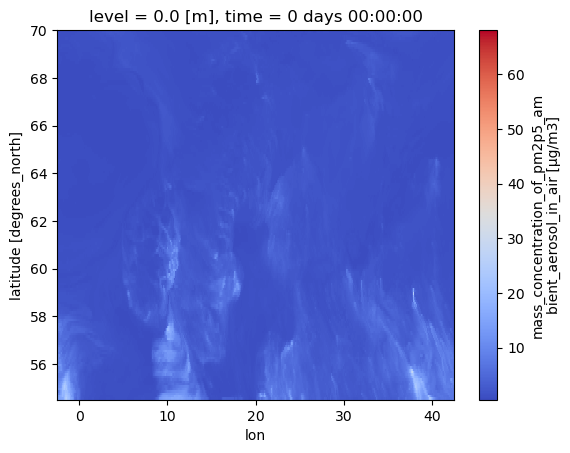

In [27]:
cams_AOI.isel(time=0).plot(cmap="coolwarm")

In [28]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmcrameri.cm as cmc

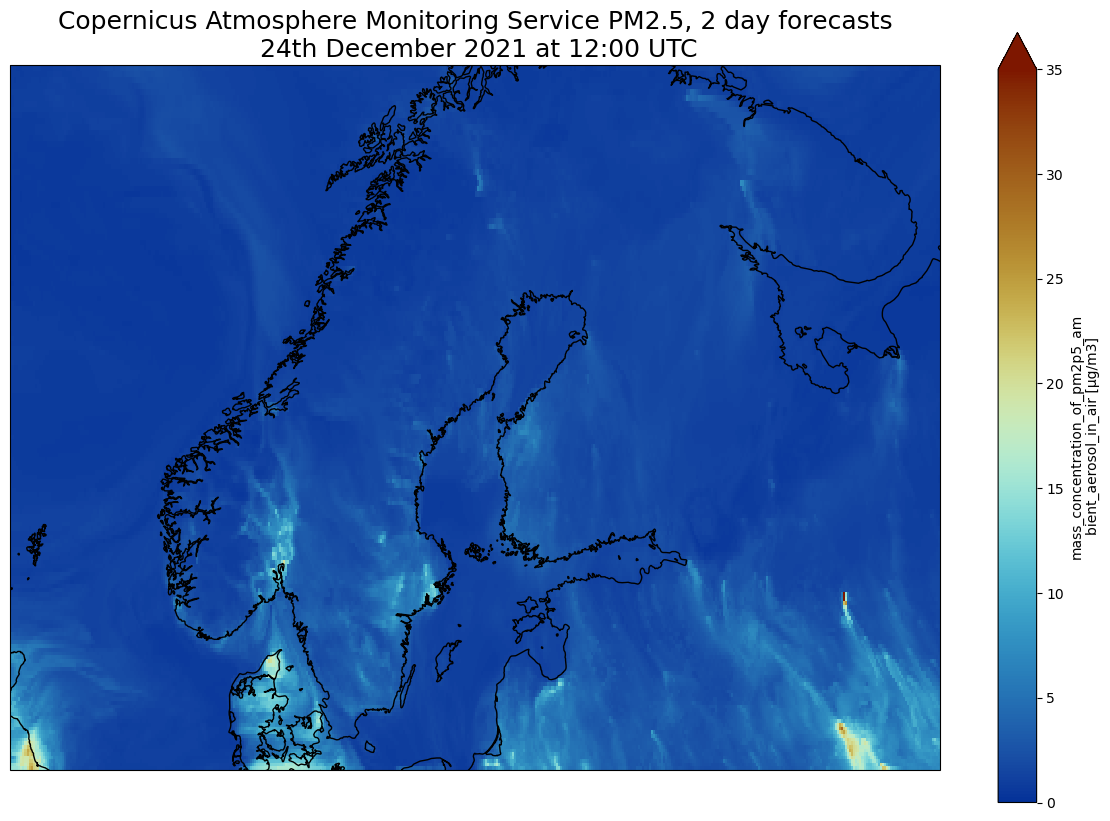

In [29]:
fig = plt.figure(1, figsize=[15,10])

# We're using cartopy to project our data.
# (see documentation on cartopy)
ax = plt.subplot(1, 1, 1, projection=ccrs.Mercator())
ax.coastlines(resolution='10m')

# We need to project our data to the new projection and for this we use `transform`.
# we set the original data projection in transform (here PlateCarree)
cams_AOI.isel(time=0).plot(ax=ax,
                                                                                    transform=ccrs.PlateCarree(),
                                                                                    vmin = 0, vmax = 35,
                                                                                    cmap=cmc.roma_r)
# One way to customize your title
plt.title("Copernicus Atmosphere Monitoring Service PM2.5, 2 day forecasts\n 24th December 2021 at 12:00 UTC", fontsize=18)
plt.savefig("CAMS-PM2_5-fc-20211224.png")

In the next episode, we will learn more about advanced visualization tools and how to make interactive plots using [holoviews](https://holoviews.org/), a tool part of the [HoloViz](https://holoviz.org/) ecosystem.

## Basic maths

PM2.5 values are in µg/m3 and we can easily convert them in ng/m3 by multiplying the values by 1000.

Simple arithmetic operations can be performed without worrying about dimensions and coordinates, using the same notation we use with `numpy`. Underneath xarray will automatically vectorize the operations over all the data dimensions.

In [30]:
cams_AOI*1000

<xarray.DataArray 'pm2p5_conc' (time: 97, level: 1, lat: 155, lon: 450)>
array([[[[  855.6641 ,   852.48096,   833.32465, ...,   879.8937 ,
            902.90106,   865.896  ],
         [  885.7343 ,   891.02075,   878.97   , ...,   971.65314,
           1061.4657 ,  1015.5647 ],
         [  893.89136,   828.7204 ,   800.25604, ...,  1032.3335 ,
            990.852  ,   982.55286],
         ...,
         [10043.194  , 10672.565  , 11238.228  , ...,  7507.282  ,
           7414.5137 ,  7444.7827 ],
         [13826.692  , 14108.494  , 14563.739  , ...,  7519.0063 ,
           7214.311  ,  7085.4043 ],
         [14878.069  , 14873.55   , 14858.358  , ...,  7069.7866 ,
           7237.475  ,  7302.5605 ]]],


       [[[  868.89185,   899.5873 ,   930.3964 , ...,   936.80554,
            839.1485 ,   772.7412 ],
         [  858.319  ,   891.28815,   934.2618 , ...,   772.7412 ,
            733.67554,   716.23883],
         [  873.09827,   925.96265,   940.6993 , ...,   729.8386 ,
...
           6790.51   ,  6748.986  ],
         [ 1623.8978 ,  1855.4778 ,  2173.332  , ...,  5969.662  ,
           6049.47   ,  6131.5386 ],
         [ 2051.7156 ,  2147.7383 ,  1941.084  , ...,  5981.9263 ,
           5846.8096 ,  5826.9146 ]]],


       [[[ 1362.0598 ,  1371.5527 ,  1349.8243 , ...,  2480.518  ,
           2496.761  ,  2526.6606 ],
         [ 1398.2976 ,  1351.3591 ,  1315.5477 , ...,  2294.1143 ,
           2327.9363 ,  2370.2136 ],
         [ 1287.1544 ,  1304.108  ,  1268.4387 , ...,  2281.4312 ,
           2239.3528 ,  2212.153  ],
         ...,
         [ 1829.8173 ,  1892.3165 ,  1997.889  , ...,  6986.432  ,
           6914.4253 ,  6935.685  ],
         [ 1650.3838 ,  1853.0875 ,  2025.124  , ...,  6504.3003 ,
           6350.027  ,  6176.655  ],
         [ 1954.8159 ,  2019.9797 ,  1916.7521 , ...,  5647.4995 ,
           5836.5464 ,  6040.9556 ]]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 69.95 69.85 69.75 69.65 ... 54.85 54.75 54.65 54.55
  * level    (level) float32 0.0
  * time     (time) timedelta64[ns] 00:00:00 01:00:00 ... 4 days 00:00:00
  * lon      (lon) float32 -2.45 -2.35 -2.25 -2.15 ... 42.15 42.25 42.35 42.45

The universal function ([ufunc](https://numpy.org/doc/stable/reference/ufuncs.html)) from numpy and scipy can be applied too directly to the data. There are currently more than 60 universal functions defined in numpy on one or more types, covering a wide variety of operations including math operations, trigonometric functions, etc.

In [31]:
np.multiply(cams_AOI, 1000)

<xarray.DataArray 'pm2p5_conc' (time: 97, level: 1, lat: 155, lon: 450)>
array([[[[  855.6641 ,   852.48096,   833.32465, ...,   879.8937 ,
            902.90106,   865.896  ],
         [  885.7343 ,   891.02075,   878.97   , ...,   971.65314,
           1061.4657 ,  1015.5647 ],
         [  893.89136,   828.7204 ,   800.25604, ...,  1032.3335 ,
            990.852  ,   982.55286],
         ...,
         [10043.194  , 10672.565  , 11238.228  , ...,  7507.282  ,
           7414.5137 ,  7444.7827 ],
         [13826.692  , 14108.494  , 14563.739  , ...,  7519.0063 ,
           7214.311  ,  7085.4043 ],
         [14878.069  , 14873.55   , 14858.358  , ...,  7069.7866 ,
           7237.475  ,  7302.5605 ]]],


       [[[  868.89185,   899.5873 ,   930.3964 , ...,   936.80554,
            839.1485 ,   772.7412 ],
         [  858.319  ,   891.28815,   934.2618 , ...,   772.7412 ,
            733.67554,   716.23883],
         [  873.09827,   925.96265,   940.6993 , ...,   729.8386 ,
...
           6790.51   ,  6748.986  ],
         [ 1623.8978 ,  1855.4778 ,  2173.332  , ...,  5969.662  ,
           6049.47   ,  6131.5386 ],
         [ 2051.7156 ,  2147.7383 ,  1941.084  , ...,  5981.9263 ,
           5846.8096 ,  5826.9146 ]]],


       [[[ 1362.0598 ,  1371.5527 ,  1349.8243 , ...,  2480.518  ,
           2496.761  ,  2526.6606 ],
         [ 1398.2976 ,  1351.3591 ,  1315.5477 , ...,  2294.1143 ,
           2327.9363 ,  2370.2136 ],
         [ 1287.1544 ,  1304.108  ,  1268.4387 , ...,  2281.4312 ,
           2239.3528 ,  2212.153  ],
         ...,
         [ 1829.8173 ,  1892.3165 ,  1997.889  , ...,  6986.432  ,
           6914.4253 ,  6935.685  ],
         [ 1650.3838 ,  1853.0875 ,  2025.124  , ...,  6504.3003 ,
           6350.027  ,  6176.655  ],
         [ 1954.8159 ,  2019.9797 ,  1916.7521 , ...,  5647.4995 ,
           5836.5464 ,  6040.9556 ]]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 69.95 69.85 69.75 69.65 ... 54.85 54.75 54.65 54.55
  * level    (level) float32 0.0
  * time     (time) timedelta64[ns] 00:00:00 01:00:00 ... 4 days 00:00:00
  * lon      (lon) float32 -2.45 -2.35 -2.25 -2.15 ... 42.15 42.25 42.35 42.45
Attributes:
    species:        PM2.5 Aerosol
    units:          µg/m3
    value:          hourly values
    standard_name:  mass_concentration_of_pm2p5_ambient_aerosol_in_air

In [32]:
cams_AOI = cams_AOI * 1000

In [33]:
cams_AOI

<xarray.DataArray 'pm2p5_conc' (time: 97, level: 1, lat: 155, lon: 450)>
array([[[[  855.6641 ,   852.48096,   833.32465, ...,   879.8937 ,
            902.90106,   865.896  ],
         [  885.7343 ,   891.02075,   878.97   , ...,   971.65314,
           1061.4657 ,  1015.5647 ],
         [  893.89136,   828.7204 ,   800.25604, ...,  1032.3335 ,
            990.852  ,   982.55286],
         ...,
         [10043.194  , 10672.565  , 11238.228  , ...,  7507.282  ,
           7414.5137 ,  7444.7827 ],
         [13826.692  , 14108.494  , 14563.739  , ...,  7519.0063 ,
           7214.311  ,  7085.4043 ],
         [14878.069  , 14873.55   , 14858.358  , ...,  7069.7866 ,
           7237.475  ,  7302.5605 ]]],


       [[[  868.89185,   899.5873 ,   930.3964 , ...,   936.80554,
            839.1485 ,   772.7412 ],
         [  858.319  ,   891.28815,   934.2618 , ...,   772.7412 ,
            733.67554,   716.23883],
         [  873.09827,   925.96265,   940.6993 , ...,   729.8386 ,
...
           6790.51   ,  6748.986  ],
         [ 1623.8978 ,  1855.4778 ,  2173.332  , ...,  5969.662  ,
           6049.47   ,  6131.5386 ],
         [ 2051.7156 ,  2147.7383 ,  1941.084  , ...,  5981.9263 ,
           5846.8096 ,  5826.9146 ]]],


       [[[ 1362.0598 ,  1371.5527 ,  1349.8243 , ...,  2480.518  ,
           2496.761  ,  2526.6606 ],
         [ 1398.2976 ,  1351.3591 ,  1315.5477 , ...,  2294.1143 ,
           2327.9363 ,  2370.2136 ],
         [ 1287.1544 ,  1304.108  ,  1268.4387 , ...,  2281.4312 ,
           2239.3528 ,  2212.153  ],
         ...,
         [ 1829.8173 ,  1892.3165 ,  1997.889  , ...,  6986.432  ,
           6914.4253 ,  6935.685  ],
         [ 1650.3838 ,  1853.0875 ,  2025.124  , ...,  6504.3003 ,
           6350.027  ,  6176.655  ],
         [ 1954.8159 ,  2019.9797 ,  1916.7521 , ...,  5647.4995 ,
           5836.5464 ,  6040.9556 ]]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 69.95 69.85 69.75 69.65 ... 54.85 54.75 54.65 54.55
  * level    (level) float32 0.0
  * time     (time) timedelta64[ns] 00:00:00 01:00:00 ... 4 days 00:00:00
  * lon      (lon) float32 -2.45 -2.35 -2.25 -2.15 ... 42.15 42.25 42.35 42.45

## Updating attributes

As we changed the units of the variable PM2.5, we need to reflect this change in the metadata of the data e.g. the attributes of `pm2p5_conc`. As we can see above, the operation did not keep any attributes so we will first copy the attributes from the original dataset and update the units.

In [34]:
cams_AOI.attrs = cams.pm2p5_conc.attrs
cams_AOI

<xarray.DataArray 'pm2p5_conc' (time: 97, level: 1, lat: 155, lon: 450)>
array([[[[  855.6641 ,   852.48096,   833.32465, ...,   879.8937 ,
            902.90106,   865.896  ],
         [  885.7343 ,   891.02075,   878.97   , ...,   971.65314,
           1061.4657 ,  1015.5647 ],
         [  893.89136,   828.7204 ,   800.25604, ...,  1032.3335 ,
            990.852  ,   982.55286],
         ...,
         [10043.194  , 10672.565  , 11238.228  , ...,  7507.282  ,
           7414.5137 ,  7444.7827 ],
         [13826.692  , 14108.494  , 14563.739  , ...,  7519.0063 ,
           7214.311  ,  7085.4043 ],
         [14878.069  , 14873.55   , 14858.358  , ...,  7069.7866 ,
           7237.475  ,  7302.5605 ]]],


       [[[  868.89185,   899.5873 ,   930.3964 , ...,   936.80554,
            839.1485 ,   772.7412 ],
         [  858.319  ,   891.28815,   934.2618 , ...,   772.7412 ,
            733.67554,   716.23883],
         [  873.09827,   925.96265,   940.6993 , ...,   729.8386 ,
...
           6790.51   ,  6748.986  ],
         [ 1623.8978 ,  1855.4778 ,  2173.332  , ...,  5969.662  ,
           6049.47   ,  6131.5386 ],
         [ 2051.7156 ,  2147.7383 ,  1941.084  , ...,  5981.9263 ,
           5846.8096 ,  5826.9146 ]]],


       [[[ 1362.0598 ,  1371.5527 ,  1349.8243 , ...,  2480.518  ,
           2496.761  ,  2526.6606 ],
         [ 1398.2976 ,  1351.3591 ,  1315.5477 , ...,  2294.1143 ,
           2327.9363 ,  2370.2136 ],
         [ 1287.1544 ,  1304.108  ,  1268.4387 , ...,  2281.4312 ,
           2239.3528 ,  2212.153  ],
         ...,
         [ 1829.8173 ,  1892.3165 ,  1997.889  , ...,  6986.432  ,
           6914.4253 ,  6935.685  ],
         [ 1650.3838 ,  1853.0875 ,  2025.124  , ...,  6504.3003 ,
           6350.027  ,  6176.655  ],
         [ 1954.8159 ,  2019.9797 ,  1916.7521 , ...,  5647.4995 ,
           5836.5464 ,  6040.9556 ]]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 69.95 69.85 69.75 69.65 ... 54.85 54.75 54.65 54.55
  * level    (level) float32 0.0
  * time     (time) timedelta64[ns] 00:00:00 01:00:00 ... 4 days 00:00:00
  * lon      (lon) float32 -2.45 -2.35 -2.25 -2.15 ... 42.15 42.25 42.35 42.45
Attributes:
    species:        PM2.5 Aerosol
    units:          µg/m3
    value:          hourly values
    standard_name:  mass_concentration_of_pm2p5_ambient_aerosol_in_air

In [35]:
cams_AOI.attrs["units"] = "ng/m3"

In [36]:
cams_AOI

<xarray.DataArray 'pm2p5_conc' (time: 97, level: 1, lat: 155, lon: 450)>
array([[[[  855.6641 ,   852.48096,   833.32465, ...,   879.8937 ,
            902.90106,   865.896  ],
         [  885.7343 ,   891.02075,   878.97   , ...,   971.65314,
           1061.4657 ,  1015.5647 ],
         [  893.89136,   828.7204 ,   800.25604, ...,  1032.3335 ,
            990.852  ,   982.55286],
         ...,
         [10043.194  , 10672.565  , 11238.228  , ...,  7507.282  ,
           7414.5137 ,  7444.7827 ],
         [13826.692  , 14108.494  , 14563.739  , ...,  7519.0063 ,
           7214.311  ,  7085.4043 ],
         [14878.069  , 14873.55   , 14858.358  , ...,  7069.7866 ,
           7237.475  ,  7302.5605 ]]],


       [[[  868.89185,   899.5873 ,   930.3964 , ...,   936.80554,
            839.1485 ,   772.7412 ],
         [  858.319  ,   891.28815,   934.2618 , ...,   772.7412 ,
            733.67554,   716.23883],
         [  873.09827,   925.96265,   940.6993 , ...,   729.8386 ,
...
           6790.51   ,  6748.986  ],
         [ 1623.8978 ,  1855.4778 ,  2173.332  , ...,  5969.662  ,
           6049.47   ,  6131.5386 ],
         [ 2051.7156 ,  2147.7383 ,  1941.084  , ...,  5981.9263 ,
           5846.8096 ,  5826.9146 ]]],


       [[[ 1362.0598 ,  1371.5527 ,  1349.8243 , ...,  2480.518  ,
           2496.761  ,  2526.6606 ],
         [ 1398.2976 ,  1351.3591 ,  1315.5477 , ...,  2294.1143 ,
           2327.9363 ,  2370.2136 ],
         [ 1287.1544 ,  1304.108  ,  1268.4387 , ...,  2281.4312 ,
           2239.3528 ,  2212.153  ],
         ...,
         [ 1829.8173 ,  1892.3165 ,  1997.889  , ...,  6986.432  ,
           6914.4253 ,  6935.685  ],
         [ 1650.3838 ,  1853.0875 ,  2025.124  , ...,  6504.3003 ,
           6350.027  ,  6176.655  ],
         [ 1954.8159 ,  2019.9797 ,  1916.7521 , ...,  5647.4995 ,
           5836.5464 ,  6040.9556 ]]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 69.95 69.85 69.75 69.65 ... 54.85 54.75 54.65 54.55
  * level    (level) float32 0.0
  * time     (time) timedelta64[ns] 00:00:00 01:00:00 ... 4 days 00:00:00
  * lon      (lon) float32 -2.45 -2.35 -2.25 -2.15 ... 42.15 42.25 42.35 42.45
Attributes:
    species:        PM2.5 Aerosol
    units:          ng/m3
    value:          hourly values
    standard_name:  mass_concentration_of_pm2p5_ambient_aerosol_in_air

## Statistics

All the standard statistical operations can be used such as `min`, `max`, `mean`. When no argument is passed to the function, the operation is done over all the dimensions of the variable (same as with `numpy`).

In [37]:
cams_AOI.min()

<xarray.DataArray 'pm2p5_conc' ()>
array(375.96038818)

You can make a statistical operation over a dimension. For instance, let's retrieve the maximum pm2p5_conc value among all those available for different times, at each lat-lon location.

In [38]:
cams_AOI.max(dim='time')

<xarray.DataArray 'pm2p5_conc' (level: 1, lat: 155, lon: 450)>
array([[[ 2121.0813,  2219.4773,  2217.5305, ...,  3652.913 ,
          3473.7568,  3577.1978],
        [ 2229.2544,  2233.2195,  2240.6362, ...,  4046.014 ,
          3602.7063,  3208.9517],
        [ 2284.292 ,  2295.2058,  2309.7578, ...,  4741.6777,
          4632.1265,  4161.8325],
        ...,
        [13408.843 , 13095.977 , 14038.214 , ..., 18508.65  ,
         18356.64  , 17824.658 ],
        [17083.7   , 16497.771 , 16912.217 , ..., 19211.908 ,
         19491.762 , 18477.52  ],
        [19680.336 , 19178.678 , 18560.22  , ..., 18558.336 ,
         18246.791 , 18232.215 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 69.95 69.85 69.75 69.65 ... 54.85 54.75 54.65 54.55
  * level    (level) float32 0.0
  * lon      (lon) float32 -2.45 -2.35 -2.25 -2.15 ... 42.15 42.25 42.35 42.45

## Aggregation
We have hourly data. To obtain daily values, we can group values per day and compute the mean. Let's first convert the time in a more human readable manner.

In [39]:
import pandas as pd

In [40]:
list_times = np.datetime64('2021-12-22') + cams.time
print(pd.to_datetime(list_times).strftime("%d %b %H:%S UTC"))

Index(['22 Dec 00:00 UTC', '22 Dec 01:00 UTC', '22 Dec 02:00 UTC',
       '22 Dec 03:00 UTC', '22 Dec 04:00 UTC', '22 Dec 05:00 UTC',
       '22 Dec 06:00 UTC', '22 Dec 07:00 UTC', '22 Dec 08:00 UTC',
       '22 Dec 09:00 UTC', '22 Dec 10:00 UTC', '22 Dec 11:00 UTC',
       '22 Dec 12:00 UTC', '22 Dec 13:00 UTC', '22 Dec 14:00 UTC',
       '22 Dec 15:00 UTC', '22 Dec 16:00 UTC', '22 Dec 17:00 UTC',
       '22 Dec 18:00 UTC', '22 Dec 19:00 UTC', '22 Dec 20:00 UTC',
       '22 Dec 21:00 UTC', '22 Dec 22:00 UTC', '22 Dec 23:00 UTC',
       '23 Dec 00:00 UTC', '23 Dec 01:00 UTC', '23 Dec 02:00 UTC',
       '23 Dec 03:00 UTC', '23 Dec 04:00 UTC', '23 Dec 05:00 UTC',
       '23 Dec 06:00 UTC', '23 Dec 07:00 UTC', '23 Dec 08:00 UTC',
       '23 Dec 09:00 UTC', '23 Dec 10:00 UTC', '23 Dec 11:00 UTC',
       '23 Dec 12:00 UTC', '23 Dec 13:00 UTC', '23 Dec 14:00 UTC',
       '23 Dec 15:00 UTC', '23 Dec 16:00 UTC', '23 Dec 17:00 UTC',
       '23 Dec 18:00 UTC', '23 Dec 19:00 UTC', '23 Dec 20:00 U

In [41]:
cams_AOI["time"] = list_times

In [42]:
cams_AOI

<xarray.DataArray 'pm2p5_conc' (time: 97, level: 1, lat: 155, lon: 450)>
array([[[[  855.6641 ,   852.48096,   833.32465, ...,   879.8937 ,
            902.90106,   865.896  ],
         [  885.7343 ,   891.02075,   878.97   , ...,   971.65314,
           1061.4657 ,  1015.5647 ],
         [  893.89136,   828.7204 ,   800.25604, ...,  1032.3335 ,
            990.852  ,   982.55286],
         ...,
         [10043.194  , 10672.565  , 11238.228  , ...,  7507.282  ,
           7414.5137 ,  7444.7827 ],
         [13826.692  , 14108.494  , 14563.739  , ...,  7519.0063 ,
           7214.311  ,  7085.4043 ],
         [14878.069  , 14873.55   , 14858.358  , ...,  7069.7866 ,
           7237.475  ,  7302.5605 ]]],


       [[[  868.89185,   899.5873 ,   930.3964 , ...,   936.80554,
            839.1485 ,   772.7412 ],
         [  858.319  ,   891.28815,   934.2618 , ...,   772.7412 ,
            733.67554,   716.23883],
         [  873.09827,   925.96265,   940.6993 , ...,   729.8386 ,
...
           6790.51   ,  6748.986  ],
         [ 1623.8978 ,  1855.4778 ,  2173.332  , ...,  5969.662  ,
           6049.47   ,  6131.5386 ],
         [ 2051.7156 ,  2147.7383 ,  1941.084  , ...,  5981.9263 ,
           5846.8096 ,  5826.9146 ]]],


       [[[ 1362.0598 ,  1371.5527 ,  1349.8243 , ...,  2480.518  ,
           2496.761  ,  2526.6606 ],
         [ 1398.2976 ,  1351.3591 ,  1315.5477 , ...,  2294.1143 ,
           2327.9363 ,  2370.2136 ],
         [ 1287.1544 ,  1304.108  ,  1268.4387 , ...,  2281.4312 ,
           2239.3528 ,  2212.153  ],
         ...,
         [ 1829.8173 ,  1892.3165 ,  1997.889  , ...,  6986.432  ,
           6914.4253 ,  6935.685  ],
         [ 1650.3838 ,  1853.0875 ,  2025.124  , ...,  6504.3003 ,
           6350.027  ,  6176.655  ],
         [ 1954.8159 ,  2019.9797 ,  1916.7521 , ...,  5647.4995 ,
           5836.5464 ,  6040.9556 ]]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 69.95 69.85 69.75 69.65 ... 54.85 54.75 54.65 54.55
  * level    (level) float32 0.0
  * lon      (lon) float32 -2.45 -2.35 -2.25 -2.15 ... 42.15 42.25 42.35 42.45
  * time     (time) datetime64[ns] 2021-12-22 2021-12-22T01:00:00 ... 2021-12-26
Attributes:
    species:        PM2.5 Aerosol
    units:          ng/m3
    value:          hourly values
    standard_name:  mass_concentration_of_pm2p5_ambient_aerosol_in_air

In [43]:
cams_daily = cams_AOI.groupby(cams_AOI.time.dt.day).mean()

In [44]:
cams_daily

<xarray.DataArray 'pm2p5_conc' (day: 5, level: 1, lat: 155, lon: 450)>
array([[[[ 1169.239  ,  1166.6467 ,  1160.973  , ...,  1441.5961 ,
           1446.9415 ,  1449.0151 ],
         [ 1173.6224 ,  1171.9554 ,  1171.7555 , ...,  1428.3876 ,
           1443.7915 ,  1446.5171 ],
         [ 1181.1288 ,  1189.5563 ,  1205.5222 , ...,  1435.0128 ,
           1436.0138 ,  1443.3612 ],
         ...,
         [ 9959.0625 ,  9706.599  , 10212.829  , ...,  8834.37   ,
           8843.07   ,  8738.081  ],
         [11996.876  , 11674.386  , 11926.778  , ...,  8548.44   ,
           8362.801  ,  8002.9683 ],
         [13141.722  , 12680.837  , 12554.7    , ...,  7965.3184 ,
           7982.112  ,  7990.6177 ]]],


       [[[ 1686.1406 ,  1708.1188 ,  1722.3102 , ...,  1365.6635 ,
           1362.4203 ,  1382.3403 ],
         [ 1709.118  ,  1726.6967 ,  1740.0448 , ...,  1310.9231 ,
           1319.0963 ,  1326.693  ],
         [ 1732.6241 ,  1738.5929 ,  1748.2808 , ...,  1290.9888 ,
...
           4905.723  ,  4991.6763 ],
         [ 1478.167  ,  1535.4425 ,  1637.3916 , ...,  4755.4307 ,
           4620.1465 ,  4505.0903 ],
         [ 1717.3419 ,  1729.2365 ,  1662.1465 , ...,  4393.5034 ,
           4420.8423 ,  4419.639  ]]],


       [[[ 1362.0598 ,  1371.5527 ,  1349.8243 , ...,  2480.518  ,
           2496.761  ,  2526.6606 ],
         [ 1398.2976 ,  1351.3591 ,  1315.5477 , ...,  2294.1143 ,
           2327.9363 ,  2370.2136 ],
         [ 1287.1544 ,  1304.108  ,  1268.4387 , ...,  2281.4312 ,
           2239.3528 ,  2212.153  ],
         ...,
         [ 1829.8173 ,  1892.3165 ,  1997.889  , ...,  6986.432  ,
           6914.4253 ,  6935.685  ],
         [ 1650.3838 ,  1853.0875 ,  2025.124  , ...,  6504.3003 ,
           6350.027  ,  6176.655  ],
         [ 1954.8159 ,  2019.9797 ,  1916.7521 , ...,  5647.4995 ,
           5836.5464 ,  6040.9556 ]]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 69.95 69.85 69.75 69.65 ... 54.85 54.75 54.65 54.55
  * level    (level) float32 0.0
  * lon      (lon) float32 -2.45 -2.35 -2.25 -2.15 ... 42.15 42.25 42.35 42.45
  * day      (day) int64 22 23 24 25 26
Attributes:
    species:        PM2.5 Aerosol
    units:          ng/m3
    value:          hourly values
    standard_name:  mass_concentration_of_pm2p5_ambient_aerosol_in_air

As we have data from 2021-12-22 to 2021-12-26, the time dimension is now `day` and takes values from `22` to `26`.

In [45]:
cams_daily.day

<xarray.DataArray 'day' (day: 5)>
array([22, 23, 24, 25, 26])
Coordinates:
  * day      (day) int64 22 23 24 25 26
Attributes:
    long_name:  FORECAST time from 20211222

<div class="alert alert-warning">
    <i class="fa-check-circle fa" style="font-size: 22px;color:#666;"></i> <b>Exercise</b>
    <br>
    <ul>
        <li>Could you change the attribute "value" from "hourly values" to "daily values"? </li>
    </ul>
</div>

## Mask

Masking can be achieved through the method `DataSet|Array.where(cond, other)` or `xr.where(cond, x, y)`.

The difference consists in the possibility to specify the value in case the condition is positive or not; `DataSet|Array.where(cond, other)` only offer the possibility to define the false condition value (by default is set to np.NaN))

In [46]:
cams_AOI.min(), cams_AOI.max()

(<xarray.DataArray 'pm2p5_conc' ()>
 array(375.96038818),
 <xarray.DataArray 'pm2p5_conc' ()>
 array(86237.3515625))

In [47]:
cams_masked = cams_AOI.where((cams_AOI >= 5000) & (cams_AOI <= 20000))

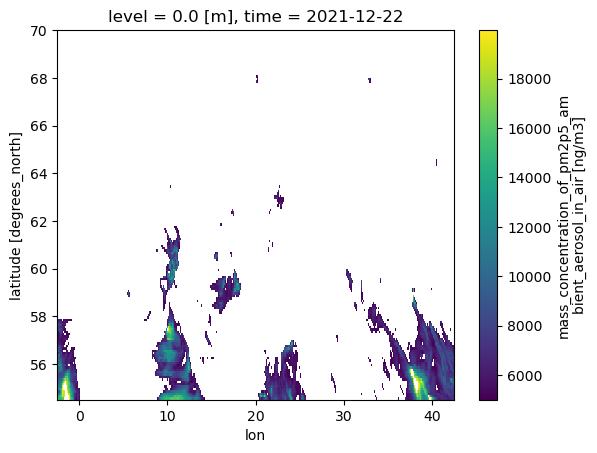

In [48]:
cams_masked.isel(time=0).plot()

To better visualize the mask, with the help of `xr.where`, ad-hoc variables can be created. 'xr.where' lets us specify values of 1 for masked and 0 for the unmasked data.

In [49]:
mask = xr.where((cams_AOI <= 5000) | (cams_AOI >= 20000), 1, 0)

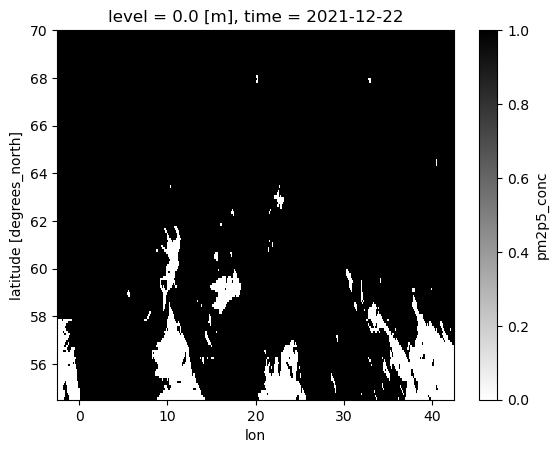

In [50]:
mask.isel(time=0).plot(cmap="binary")

Plot a single point (defined by its latitude and longitude) over the time dimension.

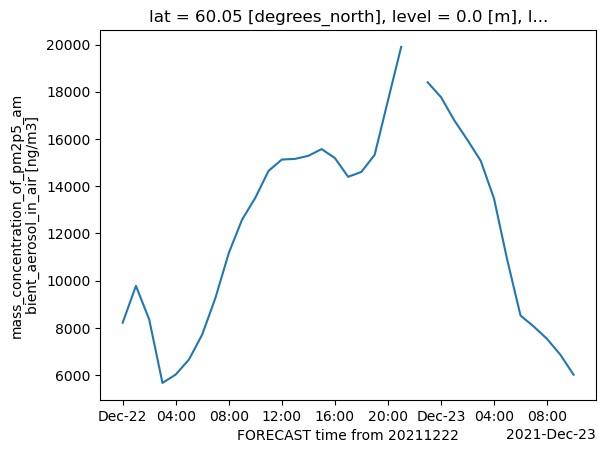

In [51]:
cams_masked.sel(lat=60., lon=10.75, method='nearest').plot()

## Save xarray Dataset

It is very often convenient to save intermediate or final results into a local file. We will learn more about the different file formats Xarray can handle, but for now let's save it as a netCDF file. Check the file size after saving the result into netCDF.

In [52]:
cams_masked.to_netcdf('cams_Nordic_masked.nc')

## Advanced Saving methods
### Encoding and Compression

From the near-surface temperature dataset we already know that values are encoded as `float32`. A compression method can be defined as well; if the format is netCDF4 with the engine set to 'netcdf4' or 'h5netcdf' there are different compression options.  The easiest solution is to stick with the default one for NetCDF4 files.

Note that encoding parameters needs to be done through a nested dictionary and parameters have to be defined for each single variable.

In [53]:
cams_masked.to_netcdf('cams_Nordic_mcs.nc',
                      engine='netcdf4',
                      encoding={'pm2p5_conc':{"dtype": np.float32,
                                        'zlib': True, 'complevel':4}
                                }
                      )

<div class=\"alert alert-success\">
<i class=\"fa-check-circle fa\" style=\"font-size: 22px;color:#666;\"></i> <b>Key Points</b>
<br>
<ul>
   <li>Xarray Dataset and DataArray</li>
   <li>Read and get metadata from local raster file</li>
   <li>Dataset and DataArray selection</li>
   <li>Aggregation and statistics</li>
   <li>Masking values</li>
   </ul>
</div>

Through the datatype and the compression a compression of almost 10 time has been achieved; as drawback reading speed has been decreased.

## References

```{bibliography}
:style: alpha
:filter: topic % "xarray" and not topic % "package"
:keyprefix: a-
```

## Packages citation

```{bibliography}
:style: alpha
:filter: topic % "xarray" and topic % "package"
:keyprefix: a-
```